<h3> HASHWANTH S</h3>

<h2>Data Science and Business Analytics Intern @ TSF </h2>

<h4>TASK 5: EDA ON INDIAN PREMIER LEAGUE (IPL)</h4>

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import init_notebook_mode,iplot
import cufflinks as cf
import chart_studio.plotly as py
init_notebook_mode(connected=True)
cf.go_offline()

In [3]:
sns.set_style('whitegrid')
%matplotlib inline

In [4]:
df = pd.read_csv('matches.csv')

In [5]:
df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [6]:
df1 = df.drop('umpire3',axis=1)

In [7]:
df1.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN


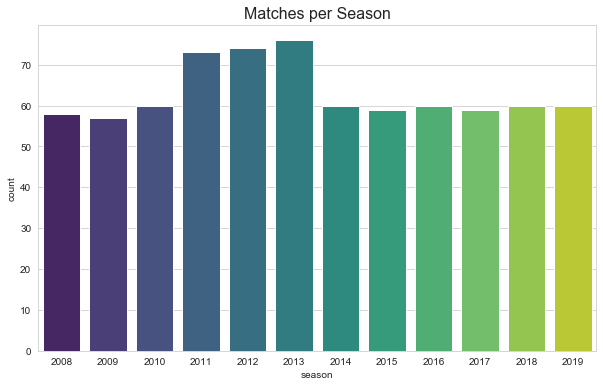

In [8]:
plt.figure(figsize = (10,6))
plt.title('Matches per Season',fontsize=16)
sns.countplot(x='season',data=df1,palette='viridis')
plt.show()

In [9]:
season_finals = df1.drop_duplicates(subset=['season'],keep='last')
season_finals[['season','winner','venue']].reset_index(drop=True).sort_values('season')

,season,winner,venue
1,2008,Rajasthan Royals,Dr DY Patil Sports Academy
2,2009,Deccan Chargers,New Wanderers Stadium
3,2010,Chennai Super Kings,Dr DY Patil Sports Academy
4,2011,Chennai Super Kings,"MA Chidambaram Stadium, Chepauk"
5,2012,Kolkata Knight Riders,"MA Chidambaram Stadium, Chepauk"
6,2013,Mumbai Indians,Eden Gardens
7,2014,Kolkata Knight Riders,M Chinnaswamy Stadium
8,2015,Mumbai Indians,Eden Gardens
9,2016,Sunrisers Hyderabad,M Chinnaswamy Stadium
0,2017,Mumbai Indians,"Rajiv Gandhi International Stadium, Uppal"


In [10]:
season_finals[['season','toss_winner','toss_decision','winner']].reset_index(drop=True).sort_values('season')

,season,toss_winner,toss_decision,winner
1,2008,Rajasthan Royals,field,Rajasthan Royals
2,2009,Royal Challengers Bangalore,field,Deccan Chargers
3,2010,Chennai Super Kings,bat,Chennai Super Kings
4,2011,Chennai Super Kings,bat,Chennai Super Kings
5,2012,Chennai Super Kings,bat,Kolkata Knight Riders
6,2013,Mumbai Indians,bat,Mumbai Indians
7,2014,Kolkata Knight Riders,field,Kolkata Knight Riders
8,2015,Chennai Super Kings,field,Mumbai Indians
9,2016,Sunrisers Hyderabad,bat,Sunrisers Hyderabad
0,2017,Mumbai Indians,bat,Mumbai Indians


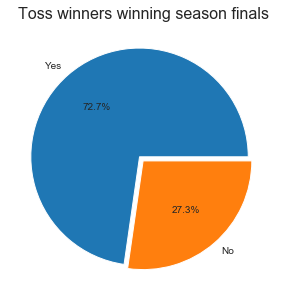

In [11]:
fig = plt.figure(figsize =(5, 5))
winning = 0;
losing = 0;
for i in range(1,len(season_finals)):
    if(season_finals['toss_winner'].reset_index(drop=True)[i] == season_finals['winner'].reset_index(drop=True)[i]):
        winning+=1;
    else:
        losing+=1;
data = [winning,losing]
label = ['Yes','No']
explode=(0.05,0.0)
plt.title('Toss winners winning season finals',fontsize=16)
plt.pie(data,labels=label,explode=explode,autopct='%1.1f%%')
plt.show()

In [12]:
season_finals[['season','winner','player_of_match']].reset_index(drop=True).sort_values('season')

,season,winner,player_of_match
1,2008,Rajasthan Royals,YK Pathan
2,2009,Deccan Chargers,A Kumble
3,2010,Chennai Super Kings,SK Raina
4,2011,Chennai Super Kings,M Vijay
5,2012,Kolkata Knight Riders,MS Bisla
6,2013,Mumbai Indians,KA Pollard
7,2014,Kolkata Knight Riders,MK Pandey
8,2015,Mumbai Indians,RG Sharma
9,2016,Sunrisers Hyderabad,BCJ Cutting
0,2017,Mumbai Indians,KH Pandya


In [13]:
season_finals['winner'].value_counts()

Mumbai Indians           4
Chennai Super Kings      3
Kolkata Knight Riders    2
Rajasthan Royals         1
Sunrisers Hyderabad      1
Deccan Chargers          1
Name: winner, dtype: int64

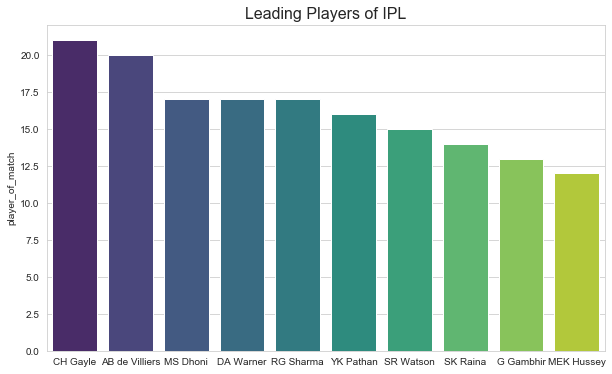

In [14]:
plt.figure(figsize = (10,6))
plt.title('Leading Players of IPL',fontsize=16)
leading_players = df1['player_of_match'].value_counts()[:10]
sns.barplot(x=leading_players.index,y=leading_players,palette="viridis")
plt.show()

In [15]:
up1 = df1['umpire1'].value_counts()
up2 = df1['umpire2'].value_counts()
dup = pd.concat([up1,up2],axis=1)
dup.head()

,umpire1,umpire2
HDPK Dharmasena,73.0,14.0
Asad Rauf,51.0,NaN
S Ravi,49.0,57.0
AK Chaudhary,43.0,15.0
Aleem Dar,38.0,NaN


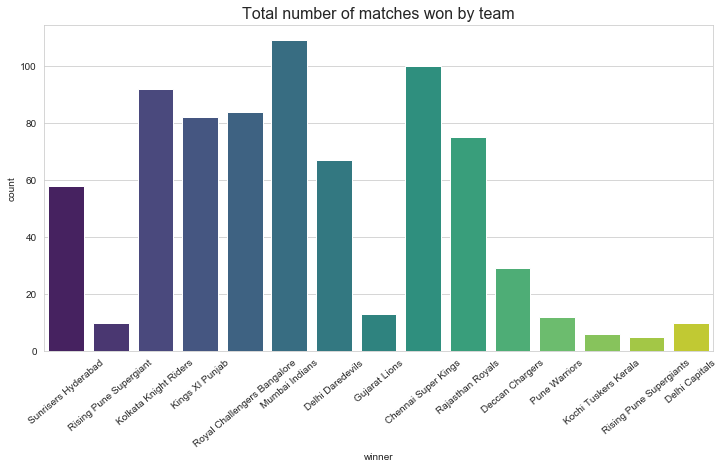

In [16]:
plt.figure(figsize = (12,6))
plt.title('Total number of matches won by team',fontsize=16)
plt.xticks(rotation=40)
sns.countplot(x='winner',data=df1,palette='viridis')

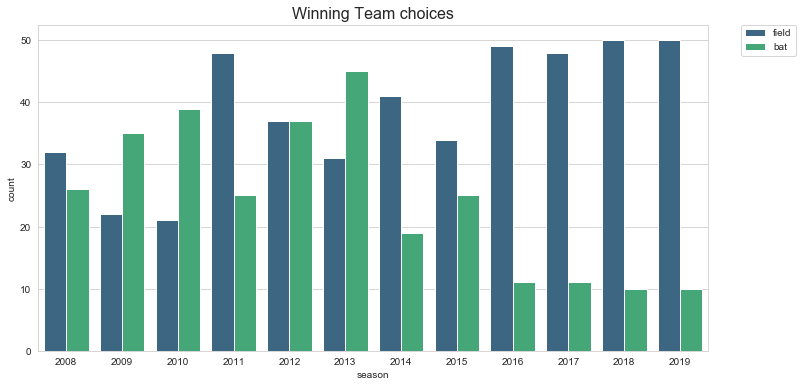

In [17]:
plt.figure(figsize = (12,6))
plt.title('Winning Team choices',fontsize=16)
sns.countplot(x='season',hue='toss_decision',data=df1,palette='viridis')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

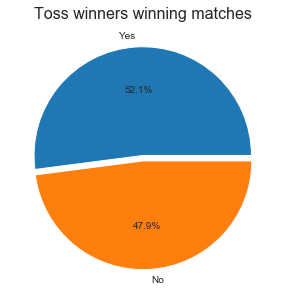

In [18]:
fig = plt.figure(figsize =(5, 5))
winning = 0;
losing = 0;
for i in range(1,len(df1)):
    if(df1['toss_winner'][i] == df1['winner'][i]):
        winning+=1;
    else:
        losing+=1;
data = [winning,losing]
label = ['Yes','No']
explode=(0.05,0.0)
plt.title('Toss winners winning matches',fontsize=16)
plt.pie(data,labels=label,explode=explode,autopct='%1.1f%%')
plt.show()

In [19]:
venue = df1['venue'].value_counts()
venue.head()

Eden Gardens                                 77
Wankhede Stadium                             73
M Chinnaswamy Stadium                        73
Feroz Shah Kotla                             67
Rajiv Gandhi International Stadium, Uppal    56
Name: venue, dtype: int64

In [20]:
df2 = pd.read_csv('deliveries.csv')
df2.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [21]:
four = df2[df2['batsman_runs']==4]
fteam = four.groupby('batting_team')['batsman_runs'].agg([('fours','count')]).sort_values('fours',ascending=False).head().reset_index()
fteam

,batting_team,fours
0,Mumbai Indians,2588
1,Kings XI Punjab,2458
2,Kolkata Knight Riders,2434
3,Royal Challengers Bangalore,2360
4,Chennai Super Kings,2193


In [22]:
six = df2[df2['batsman_runs']==6]
steam = six.groupby('batting_team')['batsman_runs'].agg([('six','count')]).sort_values('six',ascending=False).head().reset_index()
steam

,batting_team,six
0,Royal Challengers Bangalore,1132
1,Mumbai Indians,1096
2,Kings XI Punjab,976
3,Chennai Super Kings,973
4,Kolkata Knight Riders,930


In [23]:
layout = cf.Layout(height=500,width=800)
fteam.iplot(x='batting_team',y='fours',kind='bar',layout=layout,color='blue')

In [24]:
layout = cf.Layout(height=500,width=800)
steam.iplot(x='batting_team',y='six',kind='bar',layout=layout,color='red')

In [25]:
fplayer = four.groupby('batsman')['batsman_runs'].agg([('fours','count')]).sort_values('fours',ascending=False).head().reset_index()
fplayer

,batsman,fours
0,S Dhawan,526
1,SK Raina,495
2,G Gambhir,492
3,V Kohli,482
4,DA Warner,459


In [26]:
splayer = six.groupby('batsman')['batsman_runs'].agg([('six','count')]).sort_values('six',ascending=False).head().reset_index()
splayer

,batsman,six
0,CH Gayle,327
1,AB de Villiers,214
2,MS Dhoni,207
3,SK Raina,195
4,RG Sharma,194


In [27]:
layout = cf.Layout(height=500,width=800)
fplayer.iplot(x='batsman',y='fours',kind='bar',layout=layout,color='green')

In [30]:
layout = cf.Layout(height=500,width=800)
splayer.iplot(x='batsman',y='six',kind='bar',layout=layout,color='red')

In [31]:
sd = df1[['id','season']]
final_data = df2.merge(sd,how='inner',left_on='match_id',right_on='id')

In [32]:
four = final_data[final_data['batsman_runs']==4]
fseason = four.groupby('season')['batsman_runs'].agg([('fours','count')]).sort_values('season',ascending=True).reset_index()
fseason

,season,fours
0,2008,1703
1,2009,1321
2,2010,1709
3,2011,1916
4,2012,1911
5,2013,2054
6,2014,1563
7,2015,1611
8,2016,1633
9,2017,1612


In [33]:
six = final_data[final_data['batsman_runs']==6]
sseason = six.groupby('season')['batsman_runs'].agg([('six','count')]).sort_values('season',ascending=True).reset_index()
sseason

,season,six
0,2008,623
1,2009,508
2,2010,587
3,2011,639
4,2012,733
5,2013,681
6,2014,715
7,2015,692
8,2016,639
9,2017,706


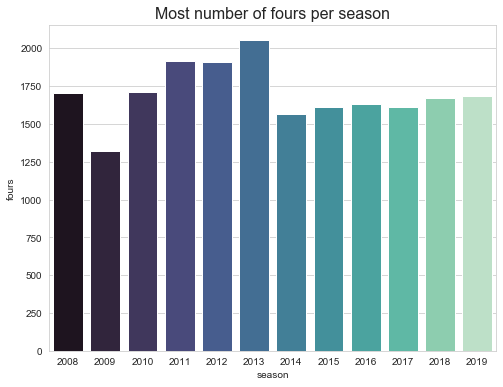

In [34]:
plt.figure(figsize=(8,6))
plt.title('Most number of fours per season',fontsize=16)
sns.barplot(x='season',y='fours',data=fseason,palette='mako')
plt.show()

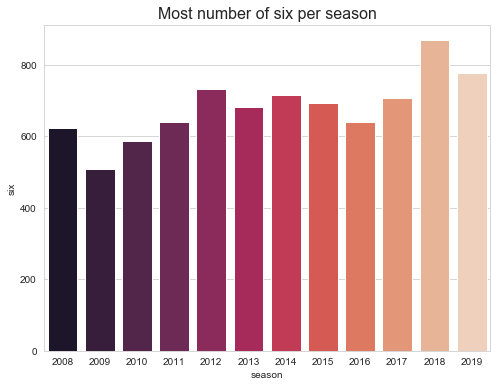

In [35]:
plt.figure(figsize=(8,6))
plt.title('Most number of six per season',fontsize=16)
sns.barplot(x='season',y='six',data=sseason,palette='rocket')
plt.show()

In [36]:
sfseason = fseason.join(sseason.set_index('season'), on='season')
fig = px.bar(sfseason, y=['fours','six'], x='season', range_y=[0,2200],barmode='group')
fig.update_layout(title_text='Comparison of Fours and six per season')
fig.show()

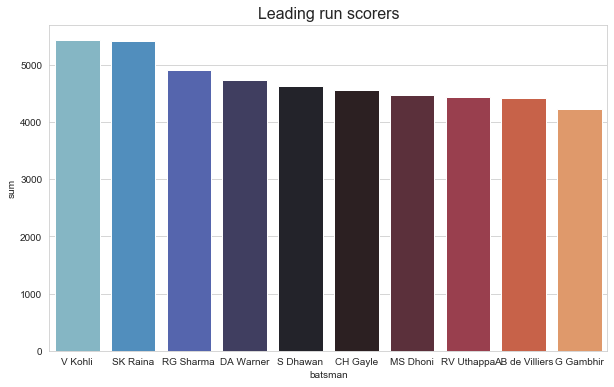

In [37]:
batsman_score = df2.groupby('batsman')['batsman_runs'].agg(['sum']).reset_index().sort_values('sum',ascending=False).head(10).reset_index(drop=True)
plt.figure(figsize=(10,6))
plt.title('Leading run scorers',fontsize=16)
sns.barplot(x='batsman',y='sum',data=batsman_score,palette='icefire')
plt.show()

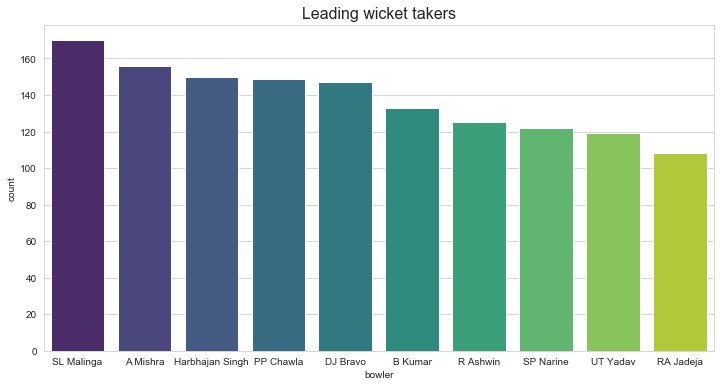

In [38]:
wickets = df2.dropna(subset=['dismissal_kind'])
wickets = wickets[~wickets['dismissal_kind'].isin(['run out','retired hurt','obstructing the field'])]
wicket_final = wickets.groupby('bowler')['dismissal_kind'].agg(['count']).reset_index().sort_values('count',ascending=False).head(10).reset_index(drop=True)
plt.figure(figsize=(12,6))
plt.title('Leading wicket takers',fontsize=16)
sns.barplot(x='bowler',y='count',data=wicket_final,palette='viridis')
plt.show()

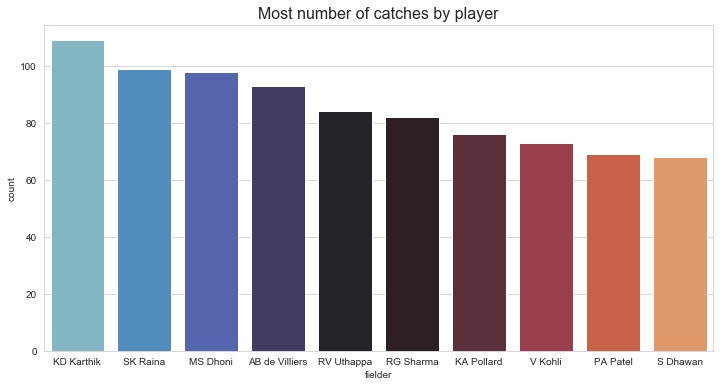

In [39]:
catch = wickets[~wickets['dismissal_kind'].isin(['run out','retired hurt','obstructing the field','bowled','lbw','stumped'])]
catchers = catch.groupby('fielder')['dismissal_kind'].agg(['count']).reset_index().sort_values('count',ascending=False).head(10).reset_index(drop=True)
plt.figure(figsize=(12,6))
plt.title('Most number of catches by player',fontsize=16)
sns.barplot(x='fielder',y='count',data=catchers,palette='icefire')
plt.show()

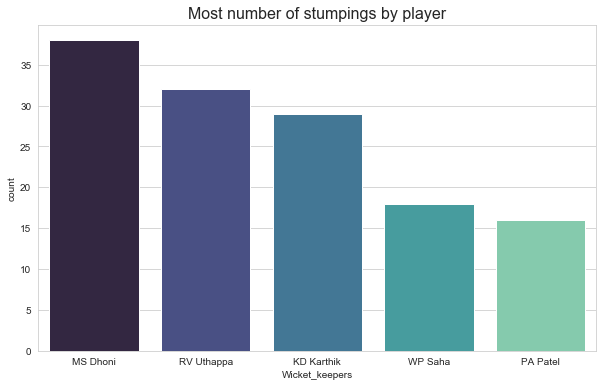

In [40]:
stumping = wickets[~wickets['dismissal_kind'].isin(['run out','retired hurt','obstructing the field','bowled','lbw','caught','caught and bowled'])]
most_stumpings = stumping.groupby('fielder')['dismissal_kind'].agg(['count']).reset_index().sort_values('count',ascending=False).head(5).reset_index(drop=True)
plt.figure(figsize=(10,6))
plt.title('Most number of stumpings by player',fontsize=16)
sns.barplot(x='fielder',y='count',data=most_stumpings,palette='mako')
plt.xlabel('Wicket_keepers')
plt.show()

In [41]:
a = df1['team1'].value_counts()
b = df1['team2'].value_counts()
c = a.add(b).sort_values(ascending=False)
c

Mumbai Indians                 187
Royal Challengers Bangalore    180
Kolkata Knight Riders          178
Kings XI Punjab                176
Chennai Super Kings            164
Delhi Daredevils               161
Rajasthan Royals               147
Sunrisers Hyderabad            108
Deccan Chargers                 75
Pune Warriors                   46
Gujarat Lions                   30
Rising Pune Supergiant          16
Delhi Capitals                  16
Rising Pune Supergiants         14
Kochi Tuskers Kerala            14
dtype: int64

In [42]:
won = df1['winner'].value_counts()
df3 = pd.concat([c,won],axis=1).reset_index()
df3.columns=['Team','Matches_played','Matches_won']
for i in range(0,len(df3)):
    df3['win_percentage'] = (df3['Matches_won']/df3['Matches_played'])*100
win_percent = df3.sort_values(by='win_percentage',ascending=False)

In [43]:
team_win_percent = win_percent[2:9].reset_index(drop=True)
team_win_percent

,Team,Matches_played,Matches_won,win_percentage
0,Chennai Super Kings,164,100,60.975610
1,Mumbai Indians,187,109,58.288770
2,Sunrisers Hyderabad,108,58,53.703704
3,Kolkata Knight Riders,178,92,51.685393
4,Rajasthan Royals,147,75,51.020408
5,Royal Challengers Bangalore,180,84,46.666667
6,Kings XI Punjab,176,82,46.590909


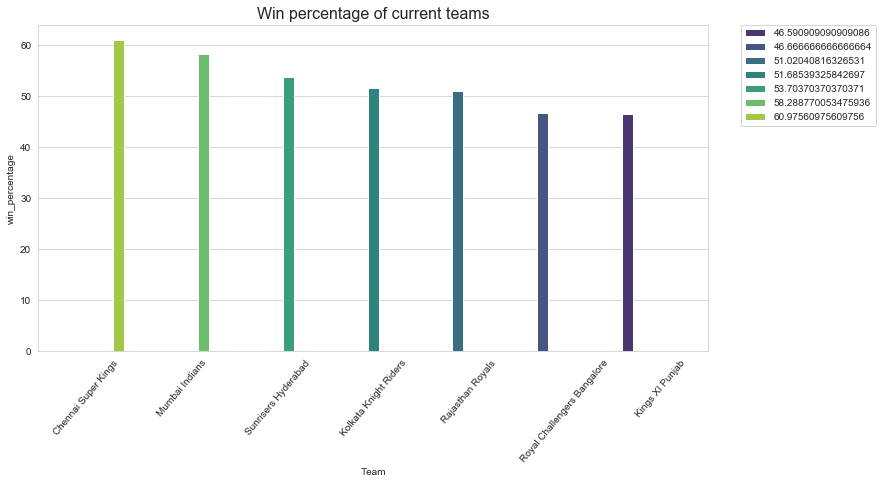

In [44]:
plt.figure(figsize=(12,6))
plt.title('Win percentage of current teams',fontsize=16)
plt.xticks(rotation=50)
sns.barplot(x='Team',y='win_percentage',data=team_win_percent,palette='viridis',hue='win_percentage')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

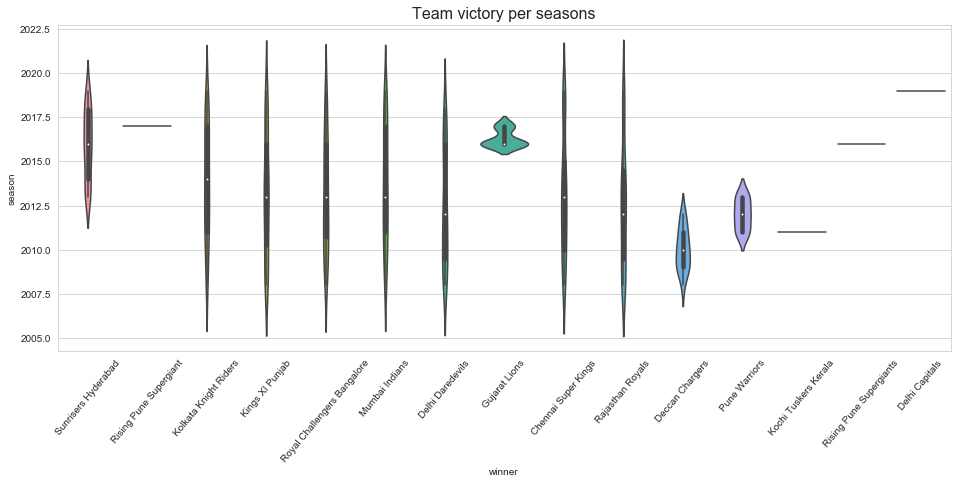

In [45]:
plt.figure(figsize=(16,6))
plt.title('Team victory per seasons',fontsize=16)
plt.xticks(rotation=50)
sns.violinplot(x="winner",y="season",data=df1)
plt.show()

In [46]:
result = df1[(df1['winner']=='Chennai Super Kings') | (df1['winner']=='Mumbai Indians')]
team_results = result.groupby('season')['winner'].value_counts().sort_values()
dff = pd.DataFrame(team_results)
dff.columns=['matches_won']
csk_mi_result = dff.reset_index().sort_values(by='season').reset_index(drop=True)
csk_mi_result.head()

,season,winner,matches_won
0,2008,Mumbai Indians,7
1,2008,Chennai Super Kings,9
2,2009,Mumbai Indians,5
3,2009,Chennai Super Kings,8
4,2010,Mumbai Indians,11


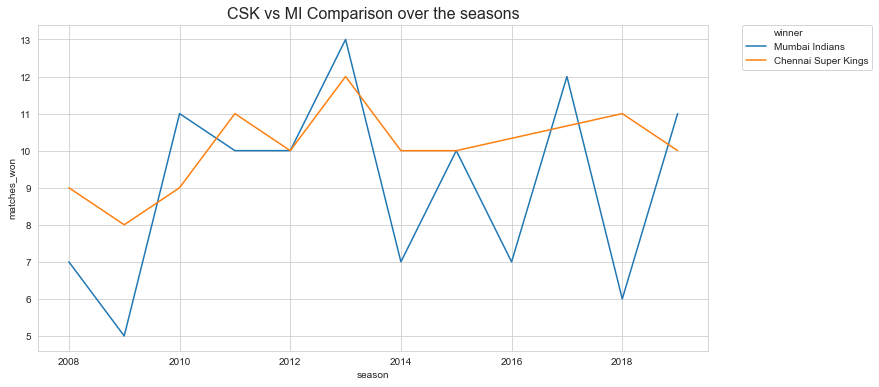

In [47]:
plt.figure(figsize=(12,6))
plt.title('CSK vs MI Comparison over the seasons',fontsize=16)
sns.lineplot(x='season',y='matches_won',data=csk_mi_result,hue='winner')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

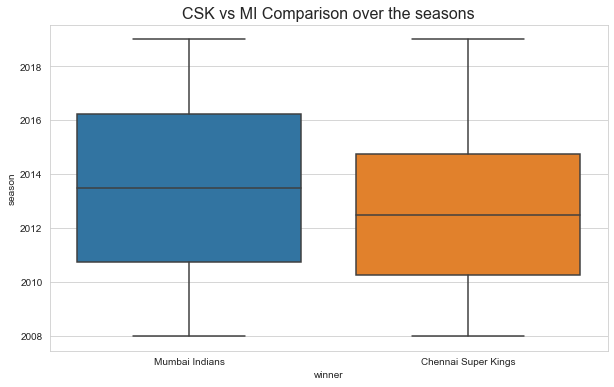

In [48]:
plt.figure(figsize=(10,6))
plt.title('CSK vs MI Comparison over the seasons',fontsize=16)
sns.boxplot(x='winner',y='season',data=csk_mi_result)
plt.show()

In [54]:
fig = px.bar(csk_mi_result, x="winner", y="matches_won",
  animation_frame="season", range_y=[0,15])
fig.update_layout(title_text='Comparison between matches won by MI and CSK per season')
fig.show()

In [50]:
batting_records = pd.read_csv('most_runs_average_strikerate.csv')
average = batting_records.sort_values(by='average',ascending=False)
strikerate = batting_records.sort_values(by='strikerate',ascending=False)

In [51]:
Top_players = strikerate.reset_index(drop=True).sort_values(by='numberofballs',ascending=False).head(10).reset_index(drop=True)
Top_players

,batsman,total_runs,out,numberofballs,average,strikerate
0,V Kohli,5426,152,4111,35.697368,131.987351
1,SK Raina,5386,160,3916,33.662500,137.538304
2,RG Sharma,4902,161,3742,30.447205,130.999466
3,S Dhawan,4601,137,3665,33.583942,125.538881
4,G Gambhir,4219,134,3400,31.485075,124.088235
5,RV Uthappa,4420,156,3381,28.333333,130.730553
6,DA Warner,4717,114,3292,41.377193,143.286756
7,MS Dhoni,4450,118,3206,37.711864,138.802246
8,AM Rahane,3834,117,3133,32.769231,122.374721
9,CH Gayle,4525,110,2972,41.136364,152.254374


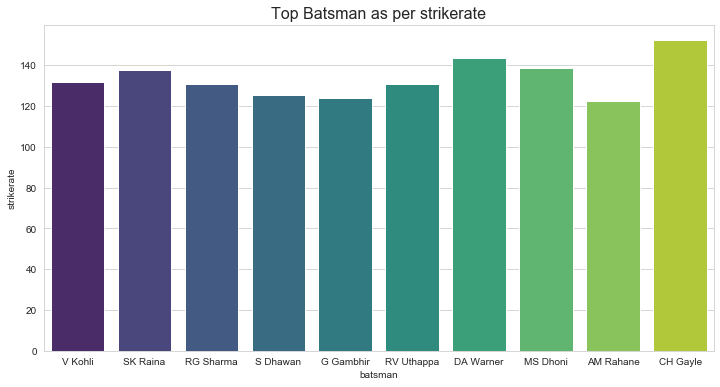

In [52]:
plt.figure(figsize=(12,6))
plt.title('Top Batsman as per strikerate',fontsize=16)
sns.barplot(x='batsman',y='strikerate',data=Top_players,palette='viridis')
plt.show()

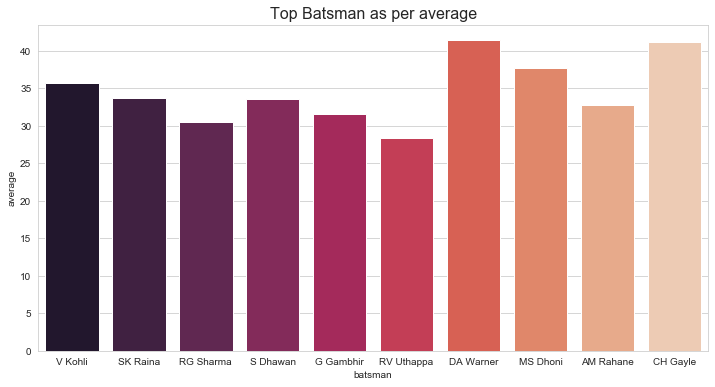

In [53]:
plt.figure(figsize=(12,6))
plt.title('Top Batsman as per average',fontsize=16)
sns.barplot(x='batsman',y='average',data=Top_players,palette='rocket')
plt.show()

** Conclusions **

<h4>Find out the most successful teams, players and factors 
contributing win or loss of a team </h4>
<h6>Most Successful Teams</h6>

<ul><li>Most successful team wrt number of cups : Mumbai Indians<br>
<li>Most successful team wrt win percentage : Chennai Super kings<br>
<li>Most successful team wrt most number of wins : Royal challengers Bangalore<br></ul>

<h6>Most Successful Players</h6>

*Batsman*<br>
<ul><li>Most successful player wrt most man of the matches : Chris Gayle<br>
<li>Most successful player wrt most runs : Virat Kohli<br>
<li>Most successful player wrt average : David Warner<br></ul>


*Fielding*<br>
<ul><li>Most wicket Taker : SL Malinga<br>
<li>Most number of catches : Dinesh Kartik<br>
<li>Most stumpings : MS Dhoni<br></ul>

<h6>Factors Contributing win or loss</h6>
<ul><li>There is a high probability of toss winners winning the match
<li>The Teams Fielding first have won most number of matches
</ul>

<h4>Suggest teams or players a company should endorse for its products</h4>

I would suggest the following, <br>
<ul><li><h6>Team:</h6> Chennai Super Kings (Based on the comparison of CSK vs MI) 
<li><h6>Player:</h6> 
    <ul><li>Batsman: Chris Gayle/ Virat Kohli (c)
        <li>Bowler: SL Malinga
        <li>Wicket Keeper: MS Dhoni (c)
        

 *** Thank You! ***